In [1]:
import pandas as pd
import numpy as np
import os
import glob
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn
import sklearn
from shapely.geometry import Point, Polygon
seaborn.set()
# numpy pandas shapely geopandas rasterio
cwd_path = os.getcwd()
usa_quake_path = cwd_path + "\\earthquake_contiguous_usa_12batch\\"
eu_quake_path = cwd_path + "\\Earthquake_2016_2018_all_eu\\"

C:\Users\antho\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Used to enumerate the files in each directory.
# Useful for finding a sepcific file's index for the us_df[] and eu_df[] arrays/list

for x, us in enumerate(glob.glob(usa_quake_path+"*.csv")):
    print("%2i %s" % (x,os.path.basename(us)))
print()
for x, eu in enumerate(glob.glob(eu_quake_path+"*.csv")):
    print("%2i %s" % (x,os.path.basename(eu)))

 0 Earthquake_2020_09_2020_10_filtered.csv
 1 Earthquake_2020_11_2020_12_filtered.csv
 2 Earthquake_2021_01_2021_02_filtered.csv
 3 Earthquake_2021_03_2021_04_filtered.csv
 4 Earthquake_2021_05_2021_06_filtered.csv
 5 Earthquake_2021_07_2021_08_filtered.csv
 6 Earthquake_2021_09_2021_10_filtered.csv
 7 Earthquake_2021_11_2021_12_filtered.csv
 8 Earthquake_2022_01_2022_02_filtered.csv
 9 Earthquake_2022_03_2022_04_filtered.csv
10 Earthquake_2022_05_2022_06_filtered.csv
11 Earthquake_2022_07_2022_08_filtered.csv

 0 Earthquake_2016_10_filtered_eu.csv
 1 Earthquake_2016_11_filtered_eu.csv
 2 Earthquake_2016_12_filtered_eu.csv
 3 Earthquake_2016_1_filtered_eu.csv
 4 Earthquake_2016_2_filtered_eu.csv
 5 Earthquake_2016_3_filtered_eu.csv
 6 Earthquake_2016_4_filtered_eu.csv
 7 Earthquake_2016_5_filtered_eu.csv
 8 Earthquake_2016_6_filtered_eu.csv
 9 Earthquake_2016_7_filtered_eu.csv
10 Earthquake_2016_8_filtered_eu.csv
11 Earthquake_2016_9_filtered_eu.csv
12 Earthquake_2017_10_filtered_eu.cs

In [3]:
# CSVs are appended to an array/list as DataFames.
# Done for both US and EU data
us_df = []
eu_df = []
for us in glob.glob(usa_quake_path+"*.csv"):
    us_df.append(pd.read_csv(us))


for eu in glob.glob(eu_quake_path+"*.csv"):
    eu_df.append(pd.read_csv(eu))


In [10]:
# Batch allocation
us_batch = []
for y in range(10):
    batch = pd.concat((us_df[y+0], us_df[y+1], us_df[y+2]),ignore_index=True)
    us_batch.append(batch)
print(len(us_batch))
print(us_batch)

10
[                          time   latitude   longitude      depth   mag
0     2020-09-01T00:30:52.227Z  38.176500 -117.801900   6.700000  3.50
1     2020-09-01T00:36:59.811Z  38.003900 -118.235800   6.600000  3.40
2     2020-09-01T01:39:34.960Z  36.394333 -120.437000   9.190000  2.87
3     2020-09-01T02:25:49.130Z  42.370000 -118.444000   8.450000  3.52
4     2020-09-01T05:51:36.757Z  38.179800 -117.863400   9.200000  3.30
...                        ...        ...         ...        ...   ...
1649  2021-02-28T20:12:49.320Z  34.326167 -116.923500   5.510000  2.94
1650  2021-02-28T20:56:22.890Z  32.068176 -102.241449   8.779256  3.20
1651  2021-02-28T21:38:38.590Z  36.363167  -98.155333   7.220000  3.68
1652  2021-02-28T22:00:42.397Z  31.688448 -104.300805   6.568604  3.20
1653  2021-02-28T23:32:57.854Z  38.169400 -117.898600  11.600000  2.80

[1654 rows x 5 columns],                           time   latitude   longitude      depth   mag
0     2020-11-01T00:47:37.474Z  31.606700 -104.

In [34]:
# Geo batch allocation
geo_us_batch = []
for y in range(10):
    geo_us_batch.append(gpd.GeoDataFrame(us_batch[y]))

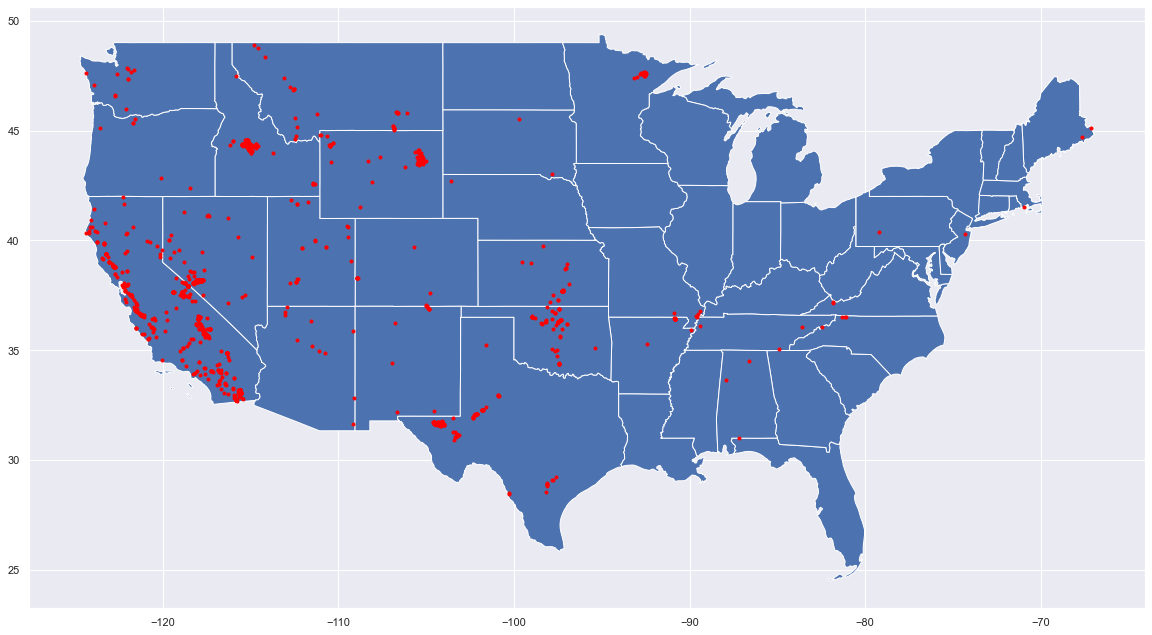

In [35]:
plt.rcParams["figure.figsize"] = [20, 20]
states = gpd.read_file('data/usa-states-census-2014.shp')
states.plot()
plt.scatter(geo_us_batch[0].longitude, geo_us_batch[0].latitude,c="red",marker='.')

In [61]:
# Geo pandas stuff
d = us_batch[0][:]
geo = gpd.GeoDataFrame(d.drop(['longitude', 'latitude'], axis = 1), crs={'init': 'epsg:4326'},geometry=[Point(xy) for xy in zip(d.longitude, d.latitude)])


C:\Users\antho\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
